### Part I: Data Loading

In [1]:
#Importing necessary modules

import pandas as pd
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS
from stop_words import get_stop_words
from collections import Counter

In [2]:
#Downloading necessary modules
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Promita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Promita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Promita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
#Importing dataset "tweets_clean"
tweets = pd.read_csv('tweets_clean.txt',sep='	',header=None)

### Part II: Data Checking & Exploration

In [4]:
tweets.head()

,0,1,2
0,145353048817012736:,Thinks that @melbahughes had a great 50th birt...,:: surprise
1,144279638024257536:,"Como una expresión tan simple, una sola oració...",:: sadness
2,140499585285111809:,the moment when you get another follower and y...,:: joy
3,145207578270507009:,Be the greatest dancer of your life! practice ...,:: joy
4,139502146390470656:,eww.. my moms starting to make her annual rum ...,:: disgust


In [5]:
#Setting column headers
tweets.columns=['tweet_id','content','sentiment']

In [6]:
tweets.head()

,tweet_id,content,sentiment
0,145353048817012736:,Thinks that @melbahughes had a great 50th birt...,:: surprise
1,144279638024257536:,"Como una expresión tan simple, una sola oració...",:: sadness
2,140499585285111809:,the moment when you get another follower and y...,:: joy
3,145207578270507009:,Be the greatest dancer of your life! practice ...,:: joy
4,139502146390470656:,eww.. my moms starting to make her annual rum ...,:: disgust


In [7]:
tweets.describe()

,tweet_id,content,sentiment
count,21051,21051,21051
unique,21009,20564,6
top,143873880707178496:,"“@RevRunWisdom: not afraid of tomorrow, for I ...",:: joy
freq,3,55,8240


In [8]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21051 entries, 0 to 21050
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   21051 non-null  object
 1   content    21051 non-null  object
 2   sentiment  21051 non-null  object
dtypes: object(3)
memory usage: 493.5+ KB


In [9]:
tweets.shape

(21051, 3)

In [10]:
tweets.head()

,tweet_id,content,sentiment
0,145353048817012736:,Thinks that @melbahughes had a great 50th birt...,:: surprise
1,144279638024257536:,"Como una expresión tan simple, una sola oració...",:: sadness
2,140499585285111809:,the moment when you get another follower and y...,:: joy
3,145207578270507009:,Be the greatest dancer of your life! practice ...,:: joy
4,139502146390470656:,eww.. my moms starting to make her annual rum ...,:: disgust


In [11]:
tweets.isnull().sum()

tweet_id     0
content      0
sentiment    0
dtype: int64

In [12]:
tweets.duplicated().sum()

0

In [13]:
tweets.sentiment.value_counts()

:: joy         8240
:: surprise    3849
:: sadness     3830
:: fear        2816
:: anger       1555
:: disgust      761
Name: sentiment, dtype: int64

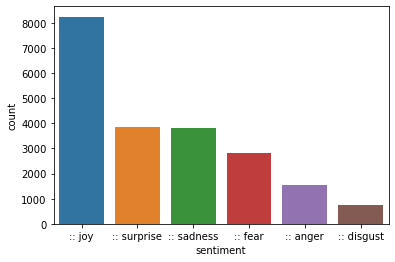

In [14]:
sns.countplot(x='sentiment', data=tweets, order = tweets['sentiment'].value_counts().index)

In [15]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


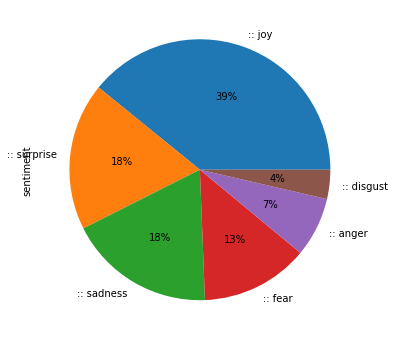

In [16]:
tweets.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [17]:
#Function to create wordcloud to explore the content of the tweets
def wc(data,bgcolor,title):
    plt.figure(figsize = (10,10))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

#Preprocessing content to explore frequency distribution of words and create wordcloud

top_N = 100

a = tweets['content'].str.lower().str.cat(sep=' ')

#Removing unnecessary characters
b = re.sub('[^A-Za-z]+', ' ', a)

#Removing stopwords
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

#CReating bag of words
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

#Removing characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Removing numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]    

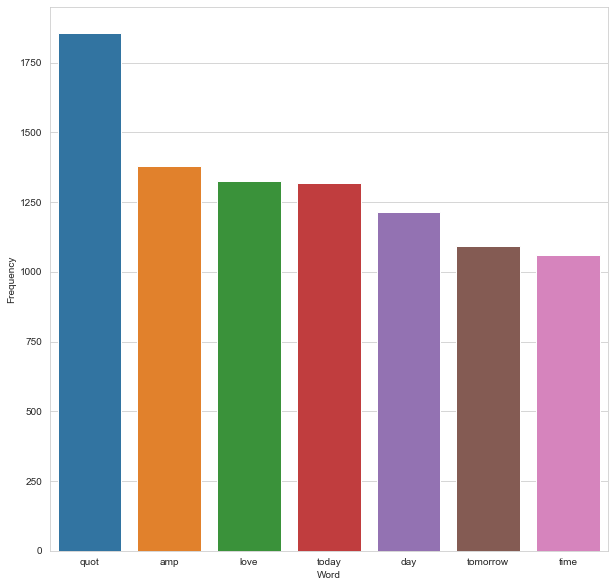

In [18]:
#Plot frequency distribution of words in content
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

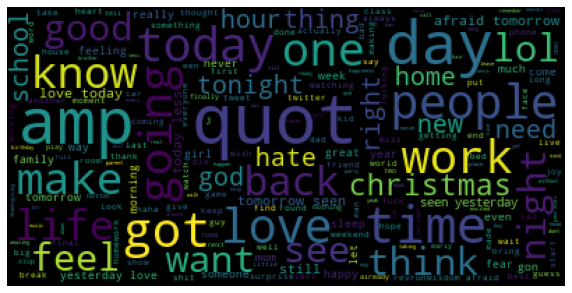

In [19]:
wc(cleaned_data_title,'black','Common Words' )

### Part III: Data Cleaning

In [20]:
#Keeping only the relevant columns
tweets = tweets[['sentiment','content']]

In [21]:
tweets.head()

,sentiment,content
0,:: surprise,Thinks that @melbahughes had a great 50th birt...
1,:: sadness,"Como una expresión tan simple, una sola oració..."
2,:: joy,the moment when you get another follower and y...
3,:: joy,Be the greatest dancer of your life! practice ...
4,:: disgust,eww.. my moms starting to make her annual rum ...


In [22]:
#Cleaning the column "sentiment"
tweets.sentiment = tweets.sentiment.str.replace(':: ','')

In [23]:
tweets.head()

,sentiment,content
0,surprise,Thinks that @melbahughes had a great 50th birt...
1,sadness,"Como una expresión tan simple, una sola oració..."
2,joy,the moment when you get another follower and y...
3,joy,Be the greatest dancer of your life! practice ...
4,disgust,eww.. my moms starting to make her annual rum ...


In [24]:
# Getting rid of the two sentiments with the lowest frequency
tweets = tweets[tweets.sentiment.isin(['joy','surprise','sadness','fear'])]

In [25]:
tweets.sentiment.value_counts()

joy         8240
surprise    3849
sadness     3830
fear        2816
Name: sentiment, dtype: int64

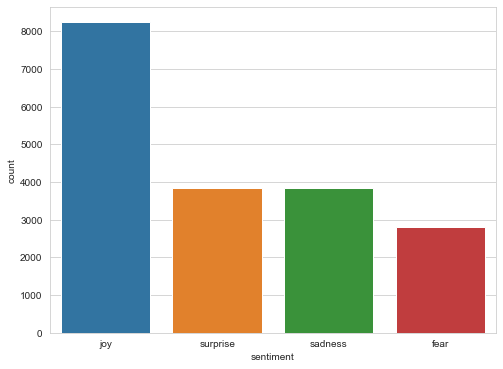

In [26]:
sns.countplot(x='sentiment', data=tweets, order = tweets['sentiment'].value_counts().index)

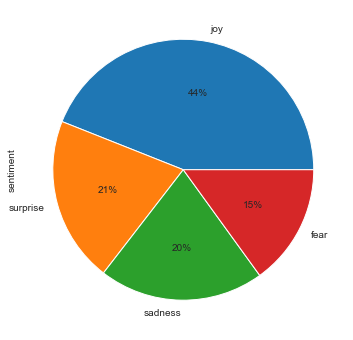

In [27]:
tweets.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [28]:
#Removing unnecessary characters
tweets['content']=tweets['content'].str.replace('[^A-Za-z0-9\s]+', '')

In [29]:
tweets.head()

,sentiment,content
0,surprise,Thinks that melbahughes had a great 50th birth...
1,sadness,Como una expresin tan simple una sola oracin p...
2,joy,the moment when you get another follower and y...
3,joy,Be the greatest dancer of your life practice d...
5,joy,If ur heart hurts all the time for tht person ...


In [30]:
#Removing hyperlinks
tweets['content']=tweets['content'].str.replace('http\S+|www.\S+', '', case=False)

In [31]:
tweets.head()

,sentiment,content
0,surprise,Thinks that melbahughes had a great 50th birth...
1,sadness,Como una expresin tan simple una sola oracin p...
2,joy,the moment when you get another follower and y...
3,joy,Be the greatest dancer of your life practice d...
5,joy,If ur heart hurts all the time for tht person ...


In [32]:
#Converting all the letters to lowercase
tweets['content']=tweets['content'].str.lower()

In [33]:
tweets.head()

,sentiment,content
0,surprise,thinks that melbahughes had a great 50th birth...
1,sadness,como una expresin tan simple una sola oracin p...
2,joy,the moment when you get another follower and y...
3,joy,be the greatest dancer of your life practice d...
5,joy,if ur heart hurts all the time for tht person ...


### Part IV: Data Preprocessing

Creating target variable using sentiments for supervised learning.

In [34]:
#Assigning target variable
target = tweets.sentiment
tweets = tweets.drop(['sentiment'],axis=1)

In [35]:
target

0        surprise
1         sadness
2             joy
3             joy
5             joy
           ...   
21045     sadness
21046         joy
21047         joy
21048         joy
21049         joy
Name: sentiment, Length: 18735, dtype: object

In [36]:
#Transforming sentiments to numerical labels
le = LabelEncoder()
le.fit(target)
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'fear': 0, 'joy': 1, 'sadness': 2, 'surprise': 3}


In [37]:
target=LabelEncoder().fit_transform(target)

In [38]:
target

array([3, 2, 1, ..., 1, 1, 1])

In [39]:
#Creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(tweets,target,stratify=target,test_size=0.3, random_state=42)

In [40]:
#Tokenizing the data on whitespace
tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [41]:
#Lemmatizing using Wordnet Lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

In [42]:
#Function to tokenize and lemmatize data
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)])

In [43]:
X_train.loc[:,'content'] = X_train['content'].apply(lemmatize_text)
X_test.loc[:,'content'] = X_test['content'].apply(lemmatize_text)

C:\Users\Promita\anaconda3\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [44]:
#Removing stop words
stop_words = set(stopwords.words('english'))

### Part V: Data Modelling

In [45]:
#Evaluation of Trainset
nb_clf = Pipeline([('vect', CountVectorizer(stop_words=stop_words)), ('clf', MultinomialNB())])
nb_clf = nb_clf.fit(X_train.content,y_train)
predicted = nb_clf.predict(X_train.content)
print('Accuracy of train set: %.2f' % (accuracy_score(predicted,y_train)*100))

Accuracy of train set: 80.29


In [46]:
#Creating function for accuracy
def print_acc(model):
    predicted = model.predict(X_test.content)
    target_names = ['fear','joy','sadness','surprise']
    print('Accuracy: %.2f' % (accuracy_score(predicted,y_test)*100))
    print('-'*30)
    print('Confusion matrix: ')
    print(confusion_matrix(predicted, y_test))
    print('-'*30)
    print('Classification Report:')
    print(classification_report(predicted,y_test, target_names=target_names))

In [47]:
#Using Pipeline to sequentially apply a list of transforms and a final estimator

In [48]:
#Fitting Naive Bayes model on the data
nb_clf = Pipeline([('vect', CountVectorizer(stop_words=stop_words)), ('clf', MultinomialNB())])
nb_clf = nb_clf.fit(X_train.content,y_train)
print_acc(nb_clf)

Accuracy: 59.56
------------------------------
Confusion matrix: 
[[ 360   45   34   48]
 [ 365 2261  672  659]
 [  84  102  398  119]
 [  36   64   45  329]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

        fear       0.43      0.74      0.54       487
         joy       0.91      0.57      0.70      3957
     sadness       0.35      0.57      0.43       703
    surprise       0.28      0.69      0.40       474

    accuracy                           0.60      5621
   macro avg       0.49      0.64      0.52      5621
weighted avg       0.75      0.60      0.63      5621



In [49]:
#Fitting Linear Support Vector Machine on the data
sgd_clf = Pipeline([('vect', CountVectorizer(stop_words=stop_words)), ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))])
sgd_clf = sgd_clf.fit(X_train.content,y_train)
print_acc(sgd_clf)

Accuracy: 61.96
------------------------------
Confusion matrix: 
[[ 391   51   48   49]
 [ 293 2165  560  490]
 [  86  122  414  103]
 [  75  134  127  513]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

        fear       0.46      0.73      0.57       539
         joy       0.88      0.62      0.72      3508
     sadness       0.36      0.57      0.44       725
    surprise       0.44      0.60      0.51       849

    accuracy                           0.62      5621
   macro avg       0.54      0.63      0.56      5621
weighted avg       0.70      0.62      0.64      5621



In [50]:
#Fitting Logistic Regression on the data
lr_clf = Pipeline([('vect', CountVectorizer(stop_words=stop_words)), ('clf', LogisticRegression(n_jobs=1, C=1e5))])
lr_clf = lr_clf.fit(X_train.content,y_train)
print_acc(lr_clf)

C:\Users\Promita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 56.57
------------------------------
Confusion matrix: 
[[ 435  117  114   83]
 [ 195 1709  368  330]
 [ 115  349  489  195]
 [ 100  297  178  547]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

        fear       0.51      0.58      0.55       749
         joy       0.69      0.66      0.67      2602
     sadness       0.43      0.43      0.43      1148
    surprise       0.47      0.49      0.48      1122

    accuracy                           0.57      5621
   macro avg       0.53      0.54      0.53      5621
weighted avg       0.57      0.57      0.57      5621



In [51]:
#Fitting Naive Bayes on data transformed with TFIDF Vectorizer
nb_clf = Pipeline([('vect', CountVectorizer(stop_words=stop_words)), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
nb_clf = nb_clf.fit(X_train.content,y_train)
print_acc(nb_clf)

Accuracy: 52.57
------------------------------
Confusion matrix: 
[[ 206    4    4   18]
 [ 603 2434 1043  898]
 [  11    7   87   11]
 [  25   27   15  228]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

        fear       0.24      0.89      0.38       232
         joy       0.98      0.49      0.65      4978
     sadness       0.08      0.75      0.14       116
    surprise       0.20      0.77      0.31       295

    accuracy                           0.53      5621
   macro avg       0.38      0.72      0.37      5621
weighted avg       0.89      0.53      0.61      5621



### Part VI: Performance Evaluation

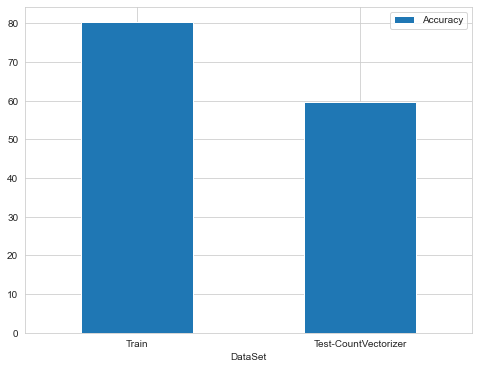

In [52]:
#Comparison between Train-Test
df = pd.DataFrame({'DataSet':['Train', 'Test-CountVectorizer'], 'Accuracy':[80.26, 59.56]})
ay = df.plot.bar(x='DataSet', y='Accuracy', rot=0)

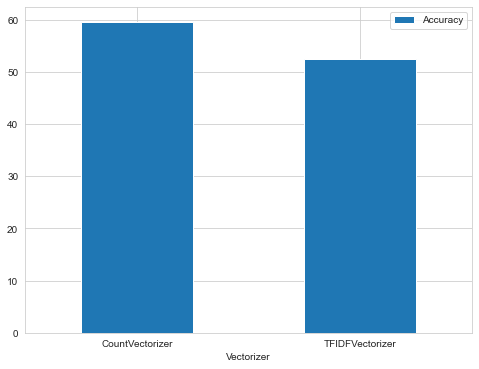

In [53]:
#Comparison between CountVectorizer and TFIDFVectorizer
df = pd.DataFrame({'Vectorizer':['CountVectorizer','TFIDFVectorizer'], 'Accuracy':[59.56,52.57]})
ay = df.plot.bar(x='Vectorizer', y='Accuracy', rot=0)

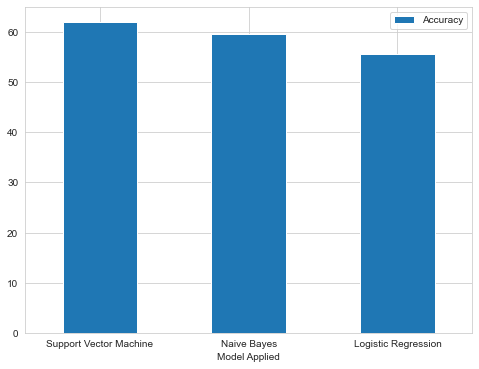

In [54]:
#Comparison between different Models
df = pd.DataFrame({'Model Applied':['Support Vector Machine', 'Naive Bayes', 'Logistic Regression'], 'Accuracy':[61.96, 59.56, 55.57]})
ay = df.plot.bar(x='Model Applied', y='Accuracy', rot=0)